In [42]:
import cptac
import cptac.utils as ut
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

1 file improts -> pvals and delta correlations
2 slice of cancer and join
3 filter to contain protein or genes that pass pval cut off and separate into pass and fail


In [2]:
perm_df = pd.read_csv("data/full_10k_permutation.csv", index_col=0)

In [180]:
perm_df

,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADAT,AAED1,...,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Cancer,,,,,,,,,,,,,,,,,,,,,
ccrcc,0.052810,0.000838,0.029716,NaN,0.337474,0.728086,6.413643e-02,0.350422,0.057700,0.652970,...,NaN,1.506673e-01,3.202242e-02,1.603670e-01,NaN,0.033585,5.243498e-01,8.419726e-02,3.727352e-01,0.202787
en,0.781720,NaN,0.911887,1.389663e-02,0.332572,0.005615,6.073417e-09,NaN,0.309108,0.020057,...,0.601641,7.465966e-01,7.258794e-06,5.565692e-09,NaN,0.285104,8.265039e-02,5.077769e-01,2.323887e-01,0.196638
luad,0.758399,NaN,0.010615,NaN,NaN,0.139531,1.567981e-36,0.022448,0.017033,0.834506,...,NaN,4.054898e-10,5.038784e-20,1.490761e-05,NaN,0.577845,1.056011e-10,4.521974e-08,2.750287e-15,0.000013
hnscc,0.996778,0.776459,0.228337,5.558182e-04,0.040184,0.014557,8.203827e-01,0.000280,NaN,0.133325,...,NaN,6.634511e-04,1.484058e-01,1.437383e-03,NaN,0.002749,8.339845e-04,8.879081e-01,1.516343e-01,0.762835
lscc,0.137994,NaN,0.097044,2.033188e-22,0.154022,0.008081,7.086254e-02,0.456664,NaN,NaN,...,0.001427,1.917384e-13,7.815859e-51,2.845191e-33,NaN,0.011741,7.526734e-03,3.401658e-09,1.794113e-06,0.018557


In [172]:
corr_diff_df["A1BG"]

Cancer
ccrcc         -0.388745
endometrial    0.061654
luad          -0.039149
hnscc         -0.002651
lscc           0.196946
Name: A1BG, dtype: float64

In [16]:
significant_list = []
for i in perm_df:
    count = 0
    for j in perm_df[i]:
        if j <= 1/13669:
            count += 1
            if i not in significant_list and count >= 3:
                significant_list.append(i)
len(significant_list)

1304

In [54]:
corr_df = pd.read_csv("data/correlations_dataframe.csv", index_col=0)
corr_diff_df = pd.read_csv("data/corr_diff.csv", index_col=0)

In [76]:
significant_list_tmp = list(corr_df.loc["LUAD"][ corr_df.loc["LUAD"]["Tissue_Type"]=="tumor"]["Gene"])
filter_list = []
for i in corr_df.loc["LUAD"][ corr_df.loc["LUAD"]["Tissue_Type"]=="tumor"]["Gene"]:
    if i in significant_list:
        filter_list.append(True)
    else:
        filter_list.append(False)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 

In [169]:
corr_diff_df

,A1BG,A1CF,A2M,A2ML1,A4GALT,AAAS,AACS,AADAC,AADAT,AAED1,...,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDA,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Cancer,,,,,,,,,,,,,,,,,,,,,
ccrcc,-0.388745,0.146993,-0.277035,NaN,-0.795957,-0.044291,-0.128218,1.196756,-0.174925,0.075959,...,NaN,0.269728,0.329727,-0.337301,NaN,0.337470,0.109414,-0.223934,-0.138352,-0.220727
endometrial,0.061654,NaN,-0.025535,0.402210,0.399061,0.663703,0.593777,NaN,0.302879,0.752754,...,0.177842,0.088061,0.759429,1.006282,NaN,-0.267078,0.400272,0.147305,0.367791,0.342423
luad,-0.039149,NaN,0.097233,NaN,NaN,0.206094,0.683092,-0.119746,0.630155,0.036340,...,NaN,0.557832,0.904669,0.645076,NaN,0.087794,0.707991,0.472139,0.418589,0.661323
hnscc,-0.002651,0.407295,-0.194186,0.117838,0.555675,0.462864,0.024965,-0.333934,-0.294627,-0.347536,...,1.039965,0.395189,0.119698,1.079145,NaN,0.591841,-0.453269,-0.010672,0.255505,-0.060708
lscc,0.196946,NaN,-0.062630,0.649123,0.246831,0.304418,0.150665,-0.068258,NaN,NaN,...,0.613891,0.491043,0.646430,0.838981,NaN,0.332350,0.231167,0.315679,0.268239,0.446553


In [176]:
luad_corr_df = corr_df.loc["LUAD"]
luad_corr_df_important = corr_df.loc["LUAD"]
luad_corr_df = luad_corr_df[luad_corr_df["Tissue_Type"]=="tumor"]["Correlation"]
luad_corr_df_important = luad_corr_df_important[luad_corr_df_important["Tissue_Type"]=="tumor"]["Correlation"]
luad_corr_df_important = luad_corr_df_important[filter_list]

luad_corr_df = luad_corr_df[[not elem for elem in filter_list]]
print(luad_corr_df_important)


Cancer_Type
LUAD    0.632226
LUAD    0.902084
LUAD    0.605527
LUAD    0.750588
LUAD    0.756635
          ...   
LUAD    0.535605
LUAD    0.501540
LUAD    0.691523
LUAD    0.772391
LUAD    0.754278
Name: Correlation, Length: 1289, dtype: float64


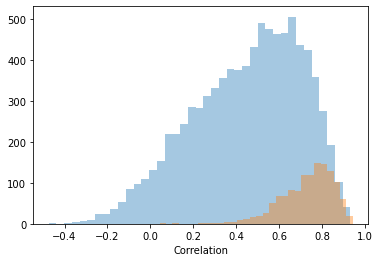

In [177]:
sns.distplot(luad_corr_df,kde = False)
sns.distplot(luad_corr_df_important, kde = False)
plt.show()

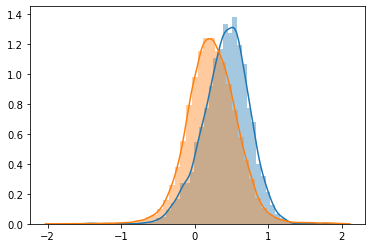

In [167]:
sns.distplot(corr_diff_df[significant_list])
sns.distplot(corr_diff_df)

plt.show()

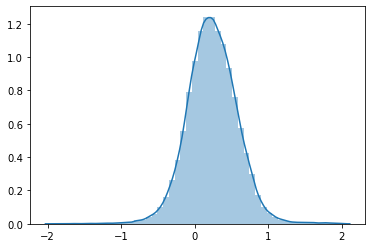

In [166]:
sns.distplot(corr_diff_df)


In [149]:
corr_diff_df["ECT2"]

Cancer
ccrcc         -0.653344
endometrial    1.422071
luad           0.922613
hnscc          0.472855
lscc           0.925967
Name: ECT2, dtype: float64

In [157]:
corr_df.loc["LUAD"][corr_df.loc["LUAD"]["Gene"] == "ECT2"]

,Tissue_Type,Gene,Correlation,P-value,R-squared
Cancer_Type,,,,,
LUAD,tumor,ECT2,0.827534,8.574226e-25,0.684812
LUAD,normal,ECT2,-0.095079,3.867256e-01,0.009040
